### Exploratory Data Analysis: Baseball Teams and Gapminder

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salaries = pd.read_csv("Salaries.csv")
teams = pd.read_csv("Teams.csv")

#### Summary team total salaries for each year

In [3]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [4]:
total_salaries_per_year = salaries.groupby(["yearID", "teamID"])[["salary"]].sum()
total_salaries_per_year.head(5)

salary
yearID teamID          
1985   ATL     14807000
       BAL     11560712
       BOS     10897560
       CAL     14427894
       CHA      9846178

In [5]:
cols = ["yearID", "teamID", "W"]
teams_subset = teams[cols]
tot_salaries_and_wins_per_year = pd.merge(total_salaries_per_year, teams_subset,
                                          on=["yearID", "teamID"])
tot_salaries_and_wins_per_year.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


This shows the summary of total salary and wins per year and team.

In [6]:
#len(tot_salaries_and_wins_per_year.yearID.unique()) # 29 years
#len(tot_salaries_and_wins_per_year.teamID.unique()) # 35 teams
tot_salaries_and_wins_per_year.yearID.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013])

#### Plot salary vs wins
Plot the relationship betweem salary and wins, per year. Highlight team Oakland.

In [7]:
#teams[teams.name.str.startswith("Oakland")].teamID.unique() # Team ID = OAK

Text(0.5,1,'2000')

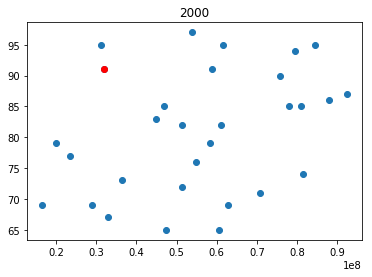

In [8]:
year = 2000
subset_year = tot_salaries_and_wins_per_year[tot_salaries_and_wins_per_year.yearID == year]

x = subset_year.salary
y = subset_year.W
z = subset_year.teamID
x_oak = subset_year[subset_year.teamID=="OAK"].salary
y_oak = subset_year[subset_year.teamID=="OAK"].W

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(x_oak, y_oak, c="red")
ax.set_title(year)

#for i, txt in enumerate(z):
#    ax.annotate(txt, (x[i], y[i]))
#plt.show()


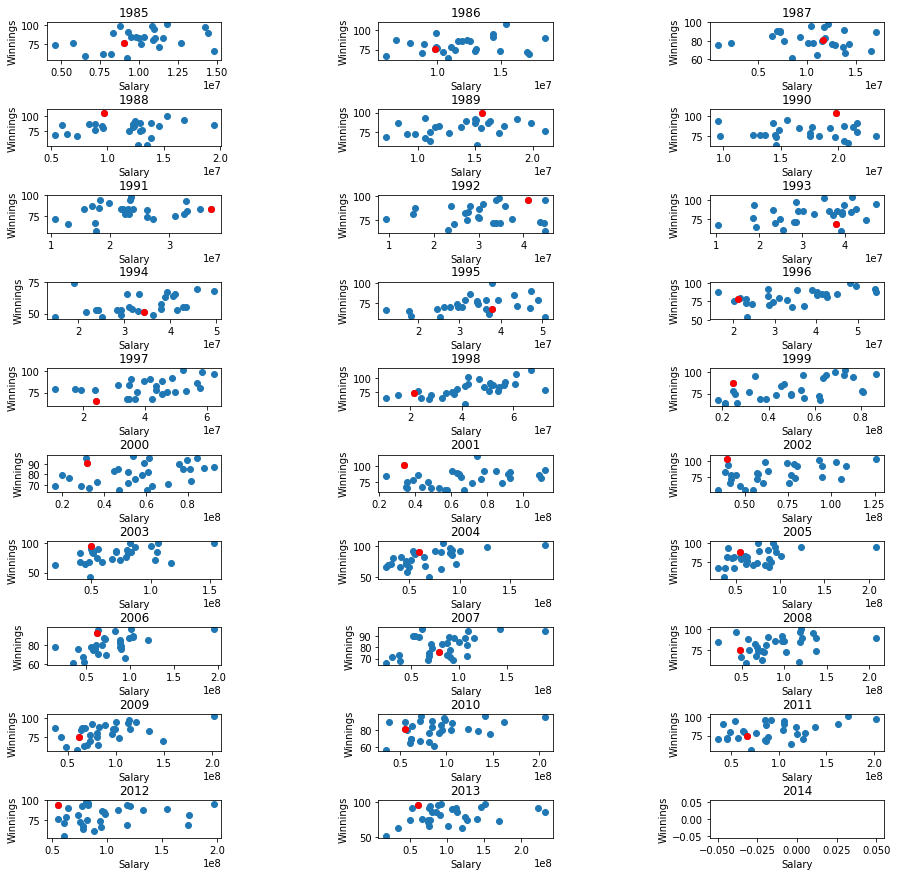

In [36]:
# define the grid for multiple plots
# sharex='col', sharey='row' # this lets share the axis
fig, ax = plt.subplots(10, 3, figsize=(15,15)) # all years
fig.subplots_adjust(hspace=1.3, wspace=0.9)
# axes are in a two-dimensional array, indexed by [row, col]
year = tot_salaries_and_wins_per_year.yearID.min() # starting year
for i in range(10):
    for j in range(3):
        subset_year = tot_salaries_and_wins_per_year[tot_salaries_and_wins_per_year.yearID == year]

        x = subset_year.salary # salary on x axis
        y = subset_year.W # winnings on y axis
        x_oak = subset_year[subset_year.teamID=="OAK"].salary
        y_oak = subset_year[subset_year.teamID=="OAK"].W
        
        ax[i, j].scatter(x,y)
        ax[i, j].scatter(x_oak, y_oak, c="red")
        ax[i, j].set_title(year)
        ax[i, j].set_xlabel("Salary")
        ax[i, j].set_ylabel("Winnings")
        year += 1


#### Discuss
I can't seem to find any real advantage for team OAK during the first years (2002-2003) where they started using Data Science. Is is something wrong with my code?

The plot seems fine, I'd expect to see a higher number of winnings for those years for the OAK team, but they seem to perform on average. Salary is higher though, did I invert axis? Fuck I did. Dumbass.

Okay now it seems fine, I see what'd expect. OAK team started using DS since 2002, that year we can see a spike in winnings, even though their total salary did not get any higher from previous years.

For 4 years they had a high number of wins, with a relative low salary (proving that something was different indeed), this advantage wore off in 2007 and the following years.
